## Quizzle Project
This notebook uses Python machine language and data science to predict a current AP Environmental Science student's score on the AP test based on the score they received on the Quizzle website. It uses a machine-learning model to predict the score based on previous students' AP and Quizzle scores.

Our approach:
1: Problem definition
2: Data
3: Evaluation
4: Features
5: Modelling
6: Experimentation

## 1. Problem Definition
We are doing a classification problem with 5 classes based on the potential AP scores of 1, 2, 3, 4, or 5. Given the results of the quizzle scores, we can then use machine learning to predict the potential AP score the student may have, which will guide their studying time.

## 2. Data
We are using simulated data to protect student confidentiality. The data includes 100 students, their scores on questions 1-50, and their final AP Environmental Score. 

## 3. Evaluation
We are looking for an accuracy rating of 85% in predicting AP scores based on their quizzle scores. If we can reach an 85% accuracy for AP Environmental Science, we can roll it out for other AP classes.

## 4. Features
Student number (1-100)
Total Number of Questions that were correct (0-50)
Actual AP score for individual students (target) (1-5)

## 5. Modeling
Testing different methods with logistic regression, random forest and nearest Neighbor.

## 6. Experimentation
Testing different methods and evaluating the models




## Tools
We are using Matplotlib, pandas, and Numpy for the machine learning for AP Scores.

In [361]:
## Importing all the tools

## Exploratory data analysis and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from matplotlib.patches import Star
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

## (Udemy, 2024)

In [362]:
## Load Data

import pandas as pd
df = pd.read_csv("new_ap_scores.csv")
df.shape


(100, 3)

In [363]:
## Data Preparation
#1. What questions we are solving?
#2. What kind of data do we have and how we treat different types?
#3. What is missing from the data and how do you deal with it?
#4. Where are the outliers and why should you care about them?
#5. How can you add, change or remove features, to get more out of your data?


In [364]:
df.head()

Student_Number  TotalCorrect  target
0               1            36       4
1               2            15       1
2               3            17       3
3               4            30       3
4               5            31       3

In [365]:
## Finding any missing data that all questions have 100 responses ...Question 14 is missing one piece of data 
df.info()
df_cleaned = df.dropna(how='all')

print(df_cleaned)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Student_Number  100 non-null    int64
 1   TotalCorrect    100 non-null    int64
 2   target          100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
    Student_Number  TotalCorrect  target
0                1            36       4
1                2            15       1
2                3            17       3
3                4            30       3
4                5            31       3
..             ...           ...     ...
95              96            12       1
96              97             4       1
97              98             0       1
98              99            37       4
99             100            42       5

[100 rows x 3 columns]


In [366]:
## Checking missing data
df.isna().sum()

Student_Number    0
TotalCorrect      0
target            0
dtype: int64

In [367]:
### Compare question 1 to Target (Ap Score)
pd.crosstab(df.target, df.TotalCorrect)



TotalCorrect  0   3   4   5   7   8   10  11  12  13  ...  37  38  39  40  41  \
target                                                ...                       
1              1   1   2   1   1   1   1   1   1   1  ...   0   0   0   0   0   
2              0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
3              0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
4              0   0   0   0   0   0   0   0   0   0  ...   5   3   5   0   0   
5              0   0   0   0   0   0   0   0   0   0  ...   0   1   0   1   1   

TotalCorrect  42  43  48  49  50  
target                            
1              0   0   0   0   0  
2              0   0   0   0   0  
3              0   0   0   0   0  
4              0   0   0   0   0  
5              2   2   2   1   1  

[5 rows x 43 columns]

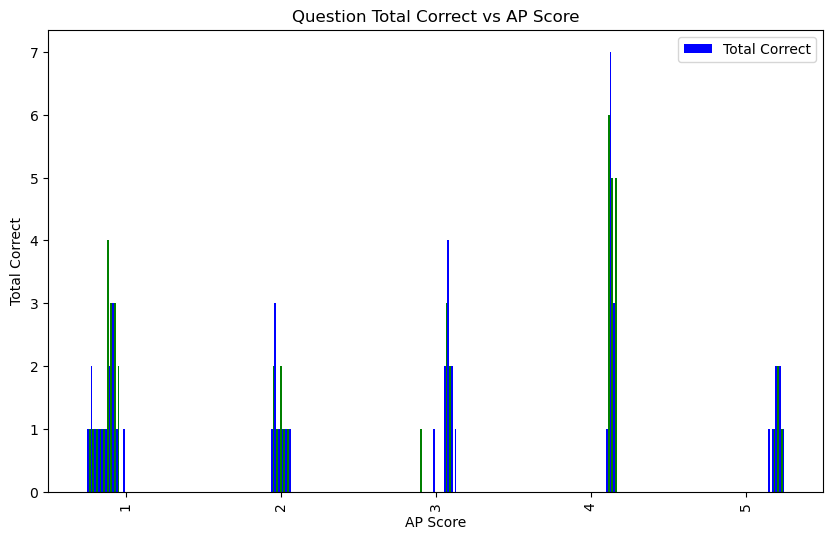

In [325]:
## ##Make a graph of Quizzle Score vs. target of AP Score
pd.crosstab(df.target, df.TotalCorrect).plot(
    kind="bar", 
    figsize=(10, 6), 
    color=["blue", "green"]
)
plt.title("Question Total Correct vs AP Score")
plt.xlabel("AP Score")
plt.ylabel("Total Correct")
plt.legend(["Total Correct"])
plt.show()



In [368]:
df["TotalCorrect"].value_counts()

TotalCorrect
36    8
35    6
37    5
39    5
17    4
21    4
15    4
38    4
32    4
34    3
19    3
22    3
24    3
18    3
31    3
30    3
20    2
16    2
42    2
25    2
43    2
33    2
48    2
4     2
26    1
7     1
13    1
5     1
49    1
11    1
14    1
12    1
41    1
29    1
40    1
50    1
28    1
8     1
3     1
27    1
23    1
10    1
0     1
Name: count, dtype: int64

In [369]:
df.corr()
        


Student_Number  TotalCorrect    target
Student_Number        1.000000     -0.101672 -0.112566
TotalCorrect         -0.101672      1.000000  0.924999
target               -0.112566      0.924999  1.000000

In [60]:
#5. Data Modeling


   

In [370]:
# Spliting the Data into X and Y
X = df.drop("target", axis =1)

y = df["target"]
X


Student_Number  TotalCorrect
0                1            36
1                2            15
2                3            17
3                4            30
4                5            31
..             ...           ...
95              96            12
96              97             4
97              98             0
98              99            37
99             100            42

[100 rows x 2 columns]

In [371]:
y

0     4
1     1
2     3
3     3
4     3
     ..
95    1
96    1
97    1
98    4
99    5
Name: target, Length: 100, dtype: int64

In [372]:
##Splitting the data into training and testing sets (Udemy, 2024)
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [373]:
X_train
_

0     4
1     1
2     3
3     3
4     3
     ..
95    1
96    1
97    1
98    4
99    5
Name: target, Length: 100, dtype: int64

In [374]:
y_train, (len(y_train))

(55    3
 88    1
 26    2
 42    2
 69    5
      ..
 60    1
 71    3
 14    2
 92    5
 51    1
 Name: target, Length: 80, dtype: int64,
 80)

In [375]:
## Machine Learning Models (Logistic Regression, K-Nearest Neighbor Classification, Random Forest Classification) (Udemy, 2024)

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
   """
   models: From Scikit-learning machine learning
   X_train: training data with no labels
   X_test: testing the data with no labels
   y_train: training labels
   Y_test: testing labels
   """

   np.random.seed(42)
   model_scores = {}

   for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
   return model_scores
    
    
  

In [290]:
model_scores = fit_and_score(models= models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/Users/elizabeth.palmer/Desktop/sample_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9, 'KNN': 0.9, 'Random Forest': 0.9}

In [376]:
## Hyperparameter tuning for KNN (scoring of 0.9) (Udemy, 2024)

train_scores = []
test_scores =[]

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))

    test_scores.append(knn.score(X_test, y_test))

    


In [334]:
test_scores

[0.8,
 0.75,
 0.9,
 0.9,
 0.9,
 0.9,
 0.95,
 0.9,
 0.95,
 0.9,
 0.9,
 0.9,
 0.9,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.8,
 0.8]

In [377]:
#(Udemy, 2024)
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Max KNN Score on the data: {max(test_scores)*100:.2f}%")

Max KNN Score on the data: 75.00%


In [378]:
## Hyperparameter tuning with RandomizedSearch CV to tune Logistic Regression and Random Forest Classification



In [379]:
## Hyperparameter grid for Logistic Regression (Udemy, 2024)
log_reg_grid= {"C": np.logspace(-4, 4, 20),
              "solver" : ["liblinear"]}

## Create a hyperparameter grid for the Random Forest Classification
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1,20,2)}
                        


In [205]:
## Tuning Logistics Regression (Udemy, 2024)
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [380]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [381]:
rs_log_reg.score(X_test, y_test)

0.7

In [341]:
## Tuning Random Forest Classification (Middle grade model so far) (Udemy, 2024)

np.random.seed(42)

rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [382]:
## The BEST Hyperparameters

rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': None}

In [539]:
model_scores

{'Logistic Regression': 0.9, 'KNN': 0.9, 'Random Forest': 0.9}

In [540]:
## Tuning our Random Forest and try to improve it. (Udemy, 2024)

rf_grid = {
    "n_estimators" :[100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap" : [True, False]
    }

gs_rf = GridSearchCV(
    estimator= RandomForestClassifier(random_state=42),
    param_grid = rf_grid,
    cv = 5,
    verbose= True,
    n_jobs = -1
)


gs_rf.fit(X_train, y_train);

print(f"Best Hyperparameter Score: {gs_rf.best_params_}")
print(f"Best Cross Validation Score: {gs_rf.best_score_:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameter Score: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross Validation Score: 0.8291


In [385]:
final_rf = RandomForestClassifier(**gs_rf.best_params_, random_state=42)
final_rf.fit(X_train, y_train)

final_score = final_rf.score(X_test, y_test)
print(f"Final Test Set Accuracy: {final_score:.4f}")

Final Test Set Accuracy: 0.8500


In [386]:
## Evaluation of the Tuned Machine Learning Classifier

y_preds = gs_rf.predict(X_test)


In [387]:
y_preds

array([4, 1, 1, 2, 4, 4, 4, 1, 4, 4, 1, 1, 3, 2, 1, 3, 1, 4, 2, 1])

In [388]:
y_test

83    4
53    1
70    2
45    3
44    4
39    4
22    4
80    1
10    4
0     4
18    1
30    1
73    3
33    2
90    1
4     3
76    3
77    4
12    2
31    1
Name: target, dtype: int64

In [389]:
## Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[6 0 0 0]
 [1 2 0 0]
 [1 1 2 0]
 [0 0 0 7]]


In [390]:
## Classification report (Udemy, 2024)
print(classification_report(y_test, y_preds, zero_division=0))
print("Unique labels in y_test:", set(y_test))
print("Unique labels in y_preds:", set(y_preds))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86         6
           2       0.67      0.67      0.67         3
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         7

    accuracy                           0.85        20
   macro avg       0.85      0.79      0.80        20
weighted avg       0.88      0.85      0.84        20

Unique labels in y_test: {1, 2, 3, 4}
Unique labels in y_preds: {1, 2, 3, 4}


In [391]:
## the model ignored the 5's since so little data sets

In [392]:
## Calculate with Cross-Validation for precision, recall, and f1-score

gs_log_reg.best_params_


{'C': 0.004832930238571752, 'solver': 'liblinear'}

In [393]:
## Create a new classifier with best parameters
clf = LogisticRegression(C=0.004832930238571752,
                         solver="liblinear")




In [394]:
## Using Cross-Validation for Accuracy

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring = "accuracy")

cv_acc

cv_acc = np.mean(cv_acc)
cv_acc

0.45999999999999996

In [352]:
## Using Cross-Validation for precision (Udemy, 2024)
precision_scorer = make_scorer(precision_score, average='weighted', zero_division=0)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring=precision_scorer)
                       
cv_precision_mean = np.mean(cv_precision)
cv_precision_mean


0.32512763260131683

In [353]:
## Using Cross-Validation for recall (Udemy, 2024)
recall_scorer = make_scorer(recall_score, average='weighted', zero_division=0)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring=recall_scorer)
                       
cv_recall_mean = np.mean(cv_recall)
cv_recall = np.mean(cv_recall)

cv_recall_mean


0.45999999999999996

In [395]:
## Using Cross-Validation for f-1 (Udemy, 2024)
f1_scorer = make_scorer(f1_score, average='weighted', zero_division=0)
 
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring=f1_scorer)
                       
cv_f1_mean = np.mean(cv_f1)
cv_f1 = np.mean(cv_f1)

cv_f1_mean


0.3311684811920106

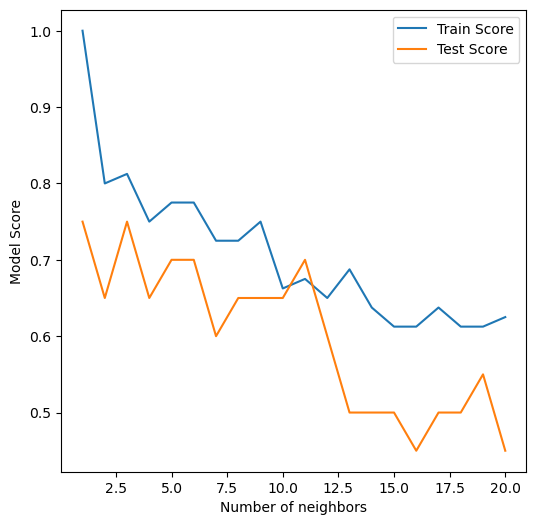

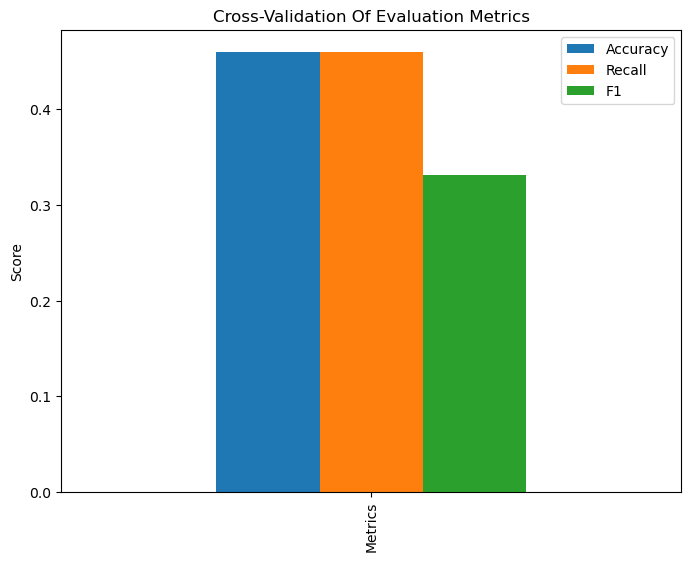

In [396]:
## Graphs of Cross-Validated Evaluations (Udemy, 2024)
v_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0, 1, 2, 3, 4])  # Example index for 5 values

cv_metrics.plot.bar(
    title="Cross-Validation Of Evaluation Metrics",
    legend=True,
    figsize=(8, 6)
)

plt.ylabel("Score")
plt.show()

In [397]:
## Feature Importance

##Since we only have one independent variable (the quizzle score) with the dependent variable (AP Score), we don't need to check for feature importance.

pd.crosstab(df["TotalCorrect"], df["target"])



target        1  2  3  4  5
TotalCorrect               
0             1  0  0  0  0
3             1  0  0  0  0
4             2  0  0  0  0
5             1  0  0  0  0
7             1  0  0  0  0
8             1  0  0  0  0
10            1  0  0  0  0
11            1  0  0  0  0
12            1  0  0  0  0
13            1  0  0  0  0
14            1  0  0  0  0
15            4  0  0  0  0
16            2  0  0  0  0
17            3  0  1  0  0
18            3  0  0  0  0
19            3  0  0  0  0
20            1  1  0  0  0
21            2  2  0  0  0
22            0  3  0  0  0
23            0  1  0  0  0
24            1  1  1  0  0
25            0  2  0  0  0
26            0  1  0  0  0
27            0  1  0  0  0
28            0  1  0  0  0
29            0  1  0  0  0
30            0  1  2  0  0
31            0  0  3  0  0
32            0  0  4  0  0
33            0  0  2  0  0
34            0  0  2  1  0
35            0  0  0  6  0
36            0  0  1  7  0
37            0  0  0  5  0
38            0  0  0  3  1
39            0  0  0  5  0
40            0  0  0  0  1
41            0  0  0  0  1
42            0  0  0  0  2
43            0  0  0  0  2
48            0  0  0  0  2
49            0  0  0  0  1
50            0  0  0  0  1

In [ ]:
## Experimentation (Udemy, 2024)
We found that logistic regression worked the best, with the highest model score of 0.9, even after tuning random forest. So, to improve, we could add more student 

In [528]:

model = LinearRegression()
X_train = pd.DataFrame({"TotalCorrect": range(50)})
y_train = [min(5, x / 10) for x in range(50)]  
model.fit(X_train[["TotalCorrect"]], y_train)

quizzle_score = 17
input_data = pd.DataFrame({"TotalCorrect": [quizzle_score]})

ap_score = model.predict(input_data)[0]

ap_score = max(0, min(5, round(ap_score)))
print(f"The predicted AP Score for a Quizzle score of {quizzle_score} is: {ap_score}")

The predicted AP Score for a Quizzle score of 17 is: 2


In [512]:
print("X_train:\n", X_train.head())
print("y_train:\n", y_train[:10])
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

X_train:
    Student_Number  TotalCorrect
0               0             0
1               1             1
2               2             2
3               3             3
4               4             4
y_train:
 [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
Model coefficients: [0.03591959]
Model intercept: 2.4019801980198023


In [552]:

model = LinearRegression()
X_train = pd.DataFrame({"TotalCorrect": range(51)})  
y_train = [min(5, x // 10 + 1) for x in range(51)]  
model.fit(X_train[["TotalCorrect"]], y_train)


out = widgets.Output()

@out.capture(clear_output=True, wait=True)
def update_quizzle_score(change):
    quizzle_score = change['new']
    input_data = pd.DataFrame({"TotalCorrect": [quizzle_score]})
    ap_score = model.predict(input_data)[0]
    ap_score = max(0, min(5, round(ap_score)))  

 
    print(f"The predicted AP Score for a Quizzle score of {quizzle_score} is a... {ap_score}! Disclaimer: This is only a prediction and cannot be guaranteed to be your AP Score. Please plan accordingly.")

    plot_charts(quizzle_score, ap_score)
    display_stars(ap_score)
    
def plot_charts(quizzle_score, ap_score):
    plt.figure(figsize=(10,6))
    plt.bar(["Quizzle Score", "Predicted AP Score"], [quizzle_score, ap_score], color=["blue", "green"])
    plt.title("Quizzle Score VS. Predicted AP Score")
    plt.ylabel("Score")
    plt.ylim(0,50)


    plt.subplot(1,2,2)
    correct = quizzle_score
    incorrect = 50 - quizzle_score
    plt.pie([correct, incorrect], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', colors=['green', 'red'])
    plt.title("Correct Questions VS. Incorrect Answers")
   
    plt.tight_layout()
    plt.show()

def display_stars(ap_score):
    filled_stars = '★' * ap_score
    empty_stars = '☆' * (5- ap_score)
    stars = filled_stars + empty_stars

    print("Predicted AP Environmental Science Score: ")
    print(stars)
    

quizzle_score_slider = widgets.IntSlider(value=25, min=0, max=50, description='Quizzle Score')
quizzle_score_slider.observe(update_quizzle_score, names='value')

display(widgets.VBox([quizzle_score_slider, out]))